### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Data Collection
import pandas_datareader as pdr
key="ce74daf4bcbcd260262fcde39094b14815c094c2"

In [2]:
import pandas_datareader as pdr

# Set your Tiingo API key
tiingo_api_key = 'ce74daf4bcbcd260262fcde39094b14815c094c2'

# Set the stock symbol/ticker for the Indian stock you want to analyze
stock_symbol = 'MSFT'  # Example: Reliance Industries Limited

# Specify the date range for historical data
start_date = '2018-01-01'
end_date = '2022-12-31'

# pandas_datareader to fetch historical data
df = pdr.get_data_tiingo(stock_symbol, start=start_date, end=end_date, api_key=tiingo_api_key)

#data is now in the 'df' DataFrame with a total of 1258 records


C:\Users\ashwin s\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('MSFT.csv')

In [4]:
df.head()

close   high    low   open    volume  \
symbol date                                                              
MSFT   2018-01-02 00:00:00+00:00  85.95  86.31  85.50  86.13  21993101   
       2018-01-03 00:00:00+00:00  86.35  86.51  85.97  86.06  24173064   
       2018-01-04 00:00:00+00:00  87.11  87.66  86.57  86.59  21145985   
       2018-01-05 00:00:00+00:00  88.19  88.41  87.43  87.66  22526563   
       2018-01-08 00:00:00+00:00  88.28  88.58  87.60  88.20  20293930   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
MSFT   2018-01-02 00:00:00+00:00  80.373511  80.710154  79.952707  80.541833   
       2018-01-03 00:00:00+00:00  80.747559  80.897178  80.392214  80.476374   
       2018-01-04 00:00:00+00:00  81.458250  81.972565  80.953285  80.971988   
       2018-01-05 00:00:00+00:00  82.468179  82.673905  81.757488  81.972565   
       2018-01-08 00:00:00+00:00  82.552339  82.832875  81.916458  82.477530   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
MSFT   2018-01-02 00:00:00+00:00   21993101      0.0          1.0  
       2018-01-03 00:00:00+00:00   24173064      0.0          1.0  
       2018-01-04 00:00:00+00:00   21145985      0.0          1.0  
       2018-01-05 00:00:00+00:00   22526563      0.0          1.0  
       2018-01-08 00:00:00+00:00   20293930      0.0          1.0

In [5]:
df.tail()

close    high       low    open    volume  \
symbol date                                                                    
MSFT   2022-12-23 00:00:00+00:00  238.73  238.87  233.9428  236.11  21206982   
       2022-12-27 00:00:00+00:00  236.96  238.93  235.8300  238.70  16688648   
       2022-12-28 00:00:00+00:00  234.53  239.72  234.1700  236.89  17457104   
       2022-12-29 00:00:00+00:00  241.01  241.92  235.6500  235.65  19770693   
       2022-12-30 00:00:00+00:00  239.82  239.96  236.6600  238.21  21938472   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
MSFT   2022-12-23 00:00:00+00:00  237.110944  237.249994  232.356210   
       2022-12-27 00:00:00+00:00  235.352948  237.309587  234.230612   
       2022-12-28 00:00:00+00:00  232.939428  238.094230  232.581870   
       2022-12-29 00:00:00+00:00  239.375481  240.279309  234.051832   
       2022-12-30 00:00:00+00:00  238.193552  238.332602  235.054983   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
MSFT   2022-12-23 00:00:00+00:00  234.508713   21206982      0.0          1.0  
       2022-12-27 00:00:00+00:00  237.081147   16688648      0.0          1.0  
       2022-12-28 00:00:00+00:00  235.283423   17457104      0.0          1.0  
       2022-12-29 00:00:00+00:00  234.051832   19770693      0.0          1.0  
       2022-12-30 00:00:00+00:00  236.594471   21938472      0.0          1.0

In [6]:
df1=df.reset_index()['close']

In [7]:
df1

0        85.95
1        86.35
2        87.11
3        88.19
4        88.28
         ...  
1254    238.73
1255    236.96
1256    234.53
1257    241.01
1258    239.82
Name: close, Length: 1259, dtype: float64

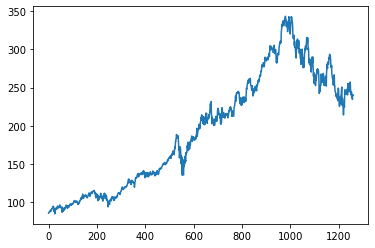

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np

In [11]:
df1

0        85.95
1        86.35
2        87.11
3        88.19
4        88.28
         ...  
1254    238.73
1255    236.96
1256    234.53
1257    241.01
1258    239.82
Name: close, Length: 1259, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

C:\Users\ashwin s\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
print(df1)

[[0.003642  ]
 [0.00519179]
 [0.00813638]
 ...
 [0.57931034]
 [0.60441689]
 [0.59980628]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(818, 441)

In [16]:
train_data

array([[0.003642  ],
       [0.00519179],
       [0.00813638],
       [0.01232081],
       [0.01266951],
       [0.01243704],
       [0.01088725],
       [0.01189461],
       [0.0177838 ],
       [0.01294072],
       [0.01987602],
       [0.01972104],
       [0.01933359],
       [0.02557148],
       [0.02669508],
       [0.02638512],
       [0.0283611 ],
       [0.03506393],
       [0.0345215 ],
       [0.02994963],
       [0.03874467],
       [0.03583882],
       [0.02623014],
       [0.01158466],
       [0.02448663],
       [0.01782255],
       [0.        ],
       [0.01228206],
       [0.01596281],
       [0.01867493],
       [0.02247191],
       [0.02963967],
       [0.02708253],
       [0.02987214],
       [0.02510655],
       [0.02603642],
       [0.03506393],
       [0.0403332 ],
       [0.03560635],
       [0.03394033],
       [0.03037582],
       [0.03115072],
       [0.03343665],
       [0.03219682],
       [0.03428904],
       [0.03649748],
       [0.04467261],
       [0.045

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 301ms/step - loss: 0.0269 - val_loss: 0.0599
Epoch 2/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 4/100
12/12 [==============================] - 2s 182ms/step - loss: 9.1256e-04 - val_loss: 0.0029
Epoch 5/100
12/12 [==============================] - 2s 184ms/step - loss: 7.8429e-04 - val_loss: 0.0033
Epoch 6/100
12/12 [==============================] - 2s 183ms/step - loss: 7.1566e-04 - val_loss: 0.0031
Epoch 7/100
12/12 [==============================] - 2s 185ms/step - loss: 7.1017e-04 - val_loss: 0.0030
Epoch 8/100
12/12 [==============================] - 2s 185ms/step - loss: 6.9628e-04 - val_loss: 0.0029
Epoch 9/100
12/12 [==============================] - 2s 186ms/step - loss: 6.9372e-04 - val_loss: 0.0039
Epoch 10/100
12/12 [==============================] - 2s 198ms/step

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.13.0'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 38ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

163.54874030604057

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

281.4997836486597

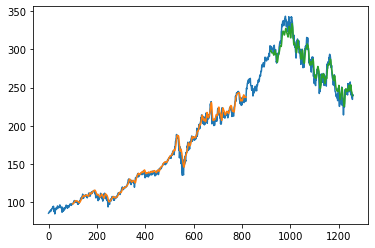

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()